<a href="https://colab.research.google.com/github/juliabui/csc408-411/blob/main/CSC411Mod3CapacityWithValidationActivity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Group Activity: Pick Capacity With Validation

##Learning goals (3)

1. See U-shape CV error vs capacity (polynomial degree).

2. Apply the “simplest within 1-σ of the best” rule.

3. Evaluate once on the held-out test set.

##More about what you're doing

###Reproducibility
**Random seed:** the starting point for a pseudo-random number generator (PRNG).
* If you reuse the same seed, you get the same sequence of "random" numbers, which makes your run reproducible.
* A seed is a bookmark for randomness—use the same bookmark, and you'll read the same 'random' story again.

### Data Generation
* [Sampling](https://www.geeksforgeeks.org/machine-learning/introduction-to-upsampling-and-downsampling-imbalanced-data-in-python/)
* [Noise](https://predictivesciencelab.github.io/data-analytics-se/lecture23/hands-on-23.5.html)

###Train/Test Split

* `test_size=0.25`: puts 25% of the data into a held-out test set; 75% becomes the training set.

* `random_state=RNG`: fixes the shuffle so everyone gets the same split (reproducible).

**Why we keep the defaults for the main run**

* Fair comparison across groups: if everyone uses 25% test + the same seed, your test scores are comparable.

* Reproducibility: your TA can re-run and match your numbers.

* Proper protocol: capacity is chosen by CV on the training set, then we do one final test just once.

**What youre allowed to change (for a second run / extension**

1. `test_size`

  * **Smaller test (e.g., 0.2)** → more train data → CV might be a bit more stable, test has fewer samples (noisier test metric).

  * **Larger test (e.g., 0.3)** → less train data → CV may be less stable, but the test metric is more stable (more test samples).

  * **Trade-off:** stability of selection (CV) vs stability of the audit (test).
2. `random_state`

    * Changing it changes which points land in train vs test.

    * Good for exploring sensitivity: do your chosen degree and test score change meaningfully?

**How to use the extension**

* Main submission: keep test_size=0.25, random_state=RNG.

* Extension run: change only one thing at a time and note it clearly

**What to look for when you change it**

* Selection stability: Does the chosen degree (via CV on the train set) stay the same?

* Test score variance: Do Test RMSE/R² move a lot across splits? (They will move some—report it.)

* Consistency with the 1-σ rule: Even if argmin moves, does the simplest within 1-σ still generalize about the same?

### Validation curve setup
###Degrees

* Sets the capacity grid you'll sweep in the validation curve.

* Each value is the polynomial degree used by PolynomialFeatures(degree=d, include_bias=False).

* Higher degree ⇒ more flexible model (can fit more curvature) ⇒ lower bias, potentially higher variance.

**Why we keep 1..8 for the main submission**

* Fast & stable: Small grid means quick runs; enough range to show underfit → sweet spot → overfit.

* Comparable across groups: Everyone searches the same degrees, so CV curves and chosen degree are apples-to-apples.

* Avoids brittle extremes: Very high degrees can behave erratically (especially without very strong regularization).

**What you're allowed to change (for a second run / extension)**

* Extend the grid modestly

* Try range(1, 10) or range(1, 12) if your machine is fast.

* Purpose: see if the CV minimum stays put or if overfitting gets worse on the right side.

**Change grid spacing**

* Coarser grid for speed: `degrees = [1, 2, 3, 4, 6, 8]`

* Finer near the minimum: if min is around 2, do `degrees = [1,2,3,4]`.

* Coordinate with α (advanced)

* If you also explore Ridge α, larger α suppresses variance so you may probe slightly higher degrees safely.

* Keep the main run fixed at α=10 and only grid degrees; co-tuning is an optional extension.

**How to use the extension**

* Extension A (wider grid):
`degrees = list(range(1, 11))  # 1..10`
* Extension B (focused near minimum): `degrees = [1, 2, 3, 4]`   
  * if your first run showed the min at 1–2
* Extension C (paired with α change):

  `degrees = list(range(1, 9))`

  `alpha = 100.0`  
  * Stronger L2; see if higher degrees become competitive

**What to look for when you change it**

* Location of the CV minimum: Does it stay at a low degree (1–2)?

* Flatness near the minimum: A flat region supports the 1-σ rule; many degrees might be “eligible.”

* Overfitting region: As degree increases, train RMSE ↓ but CV RMSE ↑—that’s the right-hand side of the U-shape.

* Stability: With larger grids, CV noise can make the exact argmin jump; does the simplest-within-1σ choice remain stable?

### Alpha

* Sets Ridge L2 regularization strength.

* In Ridge`(alpha=alpha)`, larger alpha ⇒ stronger shrinkage of coefficients ⇒ lower variance, higher bias.

* With polynomial features, L2 prevents high-degree terms from exploding and helps tame overfitting.

### Why we keep 10.0 for the main run

* Stable curves: with degree 1–8, alpha=10 keeps the train curve and CV curve well-behaved.

* Clear lesson: you’ll still see the U-shape and the 1-σ rule without wild variance.

* Comparability: everyone uses the same regularization, so results are apples-to-apples.

**What you’re allowed to change (optional extension)**

Try one value at a time and note it in your write-up:

`alpha = 1.0` (weaker L2)

* Coefficients shrink less → model fits training data more tightly.

* Expect train RMSE ↓, CV RMSE may ↓ a bit near low degrees but can ↑ at high degrees (more variance).

* The U-shape often becomes deeper/sharper; the exact argmin may shift slightly right.

`alpha = 100.0` (stronger L2)

* Coefficients shrink more → smoother, lower-variance fits.

* Expect train RMSE ↑ slightly, CV curve flattens near its minimum.

* Chosen degree via 1-σ often becomes as simple or simpler (e.g., stays at 1, or degree 2 becomes clearly unnecessary).

### CV Configuration

* `RepeatedKFold(5, 2)` builds 10 folds total (5-fold CV done twice with different shuffles).

* Each degree gets scored on those folds; you store:

* `cv_mean[d] = average` RMSE across all folds/repeats → your validation estimate.

* `cv_std[d]` = standard deviation across those folds/repeats → your uncertainty band (±1σ).

* The 1-σ rule uses that band to pick the simplest model within the error tolerance.

**Why keep 5×2 for the main run**

* Balanced: decent bias/variance of the CV estimate without being slow.

* Smoother curves than single 5-fold; enough repeats to avoid “jagged” minima.

* Comparable across groups (everyone same CV config).

**Optional changes (for a second run / discussion)**

* Fewer repeats (less stable, faster):
`CV = RepeatedKFold(n_splits=5, n_repeats=1, random_state=RNG)`
  * Expect a noisier CV curve; the exact argmin may hop. The 1-σ choice should be more stable than argmin.

* Plain KFold with shuffling (no repeats)

`from sklearn.model_selection import KFold

`CV = KFold(n_splits=5, shuffle=True, random_state=RNG)`

  * Similar to 5×1; good to show that repeats reduce variance.

* Stress test (don’t do for main run)

  * Make it heavier for smoother estimates:
`CV = RepeatedKFold(n_splits=5, n_repeats=5, random_state=RNG)`


  * Runs longer; curves usually very smooth; chosen degree often unchanged vs 5×2.

**What to look for when you change CV**

* Curve smoothness: more repeats → flatter noise, cleaner U-shape.

* Argmin stability: with fewer repeats, argmin degree may jump; report it.

* 1-σ stability: the simplest-within-1σ pick should change less often than argmin.

* cv_std size: fewer repeats → bigger std bands; more repeats → smaller bands.









Best degree = 1 | CV RMSE = 17.798 ± 0.890
Chosen (1-σ simplest) degree = 1
Eligible within 1-σ: [1, 2, 3, 4, 5, 6, 7, 8]
Test RMSE = 18.347 | Test R² = 0.283


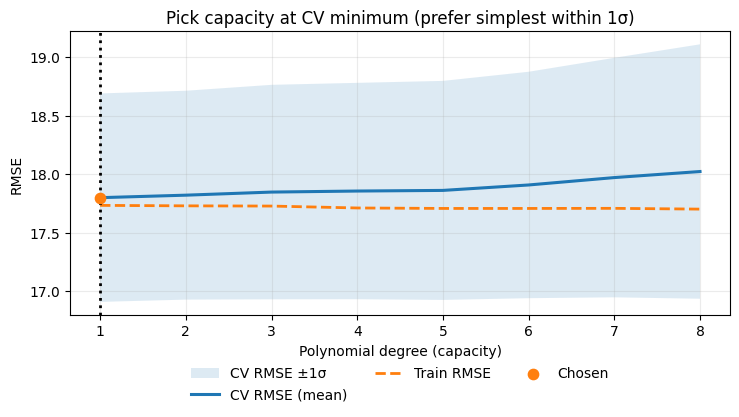

In [ ]:
# ===== Simple Capacity Selection with Validation =====
# Annotations:
#  🔧 STUDENT TODO → places you may change values as part of the activity or extensions.
#  🚫 Do not change → keep as-is to avoid leakage or breaking the assignment.

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split, RepeatedKFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# ----- Reproducibility -----
RNG = 7  # 🔧 STUDENT TODO (Extension): You may change to see effect of different random seeds.
         # Keep a record of the seed you used in your write-up.

def rmse(y_true, y_pred):
    """Version-safe RMSE (no changes needed)."""
    try:
        return mean_squared_error(y_true, y_pred, squared=False)
    except TypeError:
        return mean_squared_error(y_true, y_pred) ** 0.5

# ===== 1) Data generation =====
# 🔧 STUDENT TODO (Extension): You may tweak n_samples, noise to see curve shape changes,
# but keep feature count = 1 for this activity (so degree maps cleanly to capacity).
N_SAMPLES = 600
NOISE = 18.0

X_lin, y = make_regression(
    n_samples=N_SAMPLES,
    n_features=1,           # 🚫 Do not change (keep 1 feature to keep the exercise focused)
    noise=NOISE,
    random_state=RNG
)
x = X_lin[:, 0]

# Add a small non-linear signal so capacity matters
y = y + (0.15 * x**2) - (0.002 * x**3)

X = x.reshape(-1, 1)

# Train/test split
# 🔧 STUDENT TODO (Extension): You may change test_size or the random_state for a second run,
# but for your main submission keep these defaults so results are comparable across groups.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=RNG
)

# ===== 2) Validation curve setup =====
# 🔧 STUDENT TODO: Primary capacity grid for the assignment. Use 1..8 for speed.
# If your machine is fast, you may compare 1..10 in an optional second run.
degrees = list(range(1, 9))

# 🔧 STUDENT TODO: Ridge strength (L2). Keep at 10.0 for the main run.
# For the optional extension, try alpha = 1.0 and 100.0 and comment on changes.
alpha = 10.0

# 🔧 STUDENT TODO: CV configuration. Keep 5 folds × 2 repeats for the main run.
# Optional: change n_repeats to 1 vs 2 and discuss stability differences.
CV = RepeatedKFold(n_splits=5, n_repeats=2, random_state=RNG)

train_rmse, cv_mean, cv_std = [], [], []

# ===== 3) Capacity sweep (Pipeline prevents leakage—do not remove) =====
for d in degrees:
    pipe = Pipeline([
        ("poly",   PolynomialFeatures(degree=d, include_bias=False)),  # 🚫 do not move outside Pipeline
        ("scaler", StandardScaler()),                                   # 🚫 do not move outside Pipeline
        ("model",  Ridge(alpha=alpha, random_state=RNG))
    ])

    # Fit on train and collect training error
    pipe.fit(X_train, y_train)
    train_rmse.append(rmse(y_train, pipe.predict(X_train)))

    # CV error (neg RMSE → multiply by -1)
    scores = cross_val_score(
        pipe, X_train, y_train,
        scoring="neg_root_mean_squared_error",  # 🚫 keep RMSE for consistency
        cv=CV, n_jobs=-1
    )
    scores = -scores
    cv_mean.append(scores.mean())
    cv_std.append(scores.std())

train_rmse = np.array(train_rmse)
cv_mean = np.array(cv_mean)
cv_std = np.array(cv_std)

# ===== 4) Selection: "Simplest within 1-σ of the best" =====
# 🚫 The rule itself should not be changed for the main submission.
best_idx = int(np.argmin(cv_mean))
tolerance = cv_mean[best_idx] + cv_std[best_idx]
eligible  = [d for d, m in zip(degrees, cv_mean) if m <= tolerance]
chosen_d  = min(eligible)

print(f"Best degree = {degrees[best_idx]} | CV RMSE = {cv_mean[best_idx]:.3f} ± {cv_std[best_idx]:.3f}")
print(f"Chosen (1-σ simplest) degree = {chosen_d}")
print(f"Eligible within 1-σ: {eligible}")

# ===== 5) One final evaluation on TEST =====
# 🚫 Do not evaluate on test earlier; only here after selection.
final_pipe = Pipeline([
    ("poly",   PolynomialFeatures(degree=chosen_d, include_bias=False)),
    ("scaler", StandardScaler()),
    ("model",  Ridge(alpha=alpha, random_state=RNG))
]).fit(X_train, y_train)

y_pred_test = final_pipe.predict(X_test)
print(f"Test RMSE = {rmse(y_test, y_pred_test):.3f} | Test R² = {r2_score(y_test, y_pred_test):.3f}")

# ===== 6) Plot =====
# 🔧 STUDENT TODO (Cosmetic): You may adjust figsize or labels for readability.
fig, ax = plt.subplots(figsize=(7.5, 4.5))
ax.fill_between(degrees, cv_mean - cv_std, cv_mean + cv_std, alpha=0.15, label="CV RMSE ±1σ")
ax.plot(degrees, cv_mean, label="CV RMSE (mean)", linewidth=2.2)
ax.plot(degrees, train_rmse, "--", label="Train RMSE", linewidth=2.0)
ax.axvline(chosen_d, color="k", linestyle=":", linewidth=2)
ax.scatter([chosen_d], [cv_mean[degrees.index(chosen_d)]], s=55, zorder=5, label="Chosen")
ax.set_xlabel("Polynomial degree (capacity)")
ax.set_ylabel("RMSE")
ax.set_title("Pick capacity at CV minimum (prefer simplest within 1σ)")
ax.legend(frameon=False, ncol=3, loc="lower center", bbox_to_anchor=(0.5, -0.35))
ax.grid(alpha=0.25)
plt.tight_layout()
plt.show()

# ===== 7) Optional extensions (run AFTER your main submission) =====
# 🔧 STUDENT TODO (Extension A): Change alpha = 1.0, then 100.0 and re-run the whole cell.
# 🔧 STUDENT TODO (Extension B): Change CV to RepeatedKFold(..., n_repeats=1) and compare stability.
# 🔧 STUDENT TODO (Extension C): Expand degrees to range(1, 10) and see whether eligible set grows.
# 🔧 STUDENT TODO (Extension D): Change RNG for train/test split and CV random_state to observe variability.



# What to submit (1 slide or half-page)

### **A. Selection**

* Argmin degree = __ ; CV RMSE = __ ± __

* Chosen degree (1-σ rule) = __ ; CV RMSE = __

* Eligible set within 1-σ = { … }

### **B. Test check**

* Test RMSE (chosen) = __ ; Test R² = __

* One sentence: does chosen≈argmin on test?

### **C. One-liner explanation**

* “We picked degree __ because it's the simplest model within 1-σ of the CV minimum, which reduces variance without hurting validation error.”

# Discussion prompts (short answers)

1. Where is the U-shape and what does it say about bias vs variance here?

2. Why is the train curve usually below the CV curve?

3. Why pick “simplest within 1-σ” instead of the absolute argmin?

4. If you expanded the degree grid or reduced noise, what do you expect to change?